## Importing libraries

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data pre processing

In [57]:
X=np.array(
    [
        [0.4,1.1],
        [1.2,1.9],
        [1.9,1.7],
        [2,2.8],
        [2.8,2.3]
    ]
)
X.shape

(5, 2)

### Plot data

In [66]:
def plotCanvas():
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.axhline(color='black',linestyle='dashed',lw=2)
    plt.axvline(color='black',linestyle='dashed',lw=2)

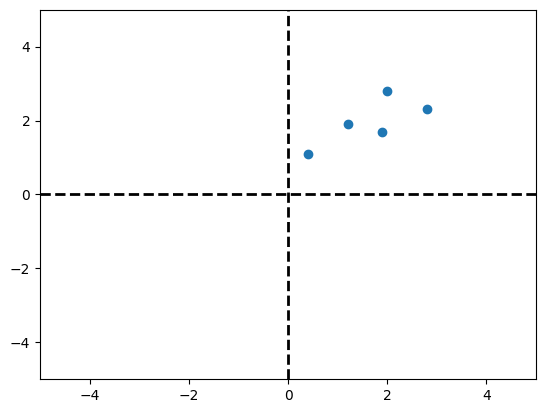

In [67]:
plotCanvas()
plt.scatter(X[:,0],X[:,1])

### Centralize data

In [59]:
def centralize(X):
    mean=[]
    for i in range(X.shape[1]):
        mean.append(np.mean(X[:,i]))
    for i in range(X.shape[1]):
        X[:,i]-=mean[i]
    return X

### Plot centralized data

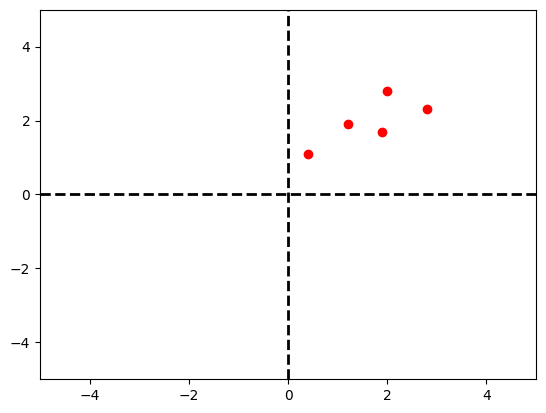

In [60]:
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.axhline(color='black',linestyle='dashed',lw=2)
plt.axvline(color='black',linestyle='dashed',lw=2)
plt.scatter(X[:,0],X[:,1],c='red')

### Get covariance matrix

In [61]:
def covarianceMatrix(X):
    return (1/X.shape[1])*X.T@X

In [62]:
cov=covarianceMatrix(X)
cov.shape

(2, 2)

### Find eign vectors, values

In [63]:
eignValues,eignVectors=np.linalg.eig(cov)

In [64]:
print(eignValues)
pd.DataFrame(eignVectors,columns=['First','Second'],index=['X','Y'])

[ 0.42773459 18.51726541]


,First,Second
X,-0.743222,-0.669045
Y,0.669045,-0.743222


### Sum of squared distances

In [ ]:
def sumOfSquaredDistances(X,eignVector):
    projections=[]
    for i in range(i):
        c=0
        for j in range(X.shape[1]):
            c+=X[i,j]*eignVector[j]
        projections.appemnd((np.linalg.norn(c*X[i,:]))**2)
        return sum(projections)

### Plot eign vector and data

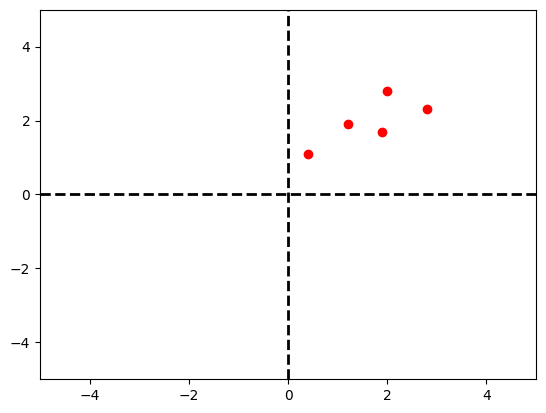

In [70]:
plotCanvas()
s=np.linspace(-5,5,100)

plt.plot(X[:,0],X[:,1],'o',c='red')

for i in range(X.shape[1]):
    